In [1]:
import pyforest

from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell`==
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously`==
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ▶  Data Import

In [2]:
df = pd.read_csv('D:\GitHub Repos\WGU_MSDA\D212_Data Mining\medical_clean.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# Creating a copy of the original dataframe and dropping columns that are not needed for clustering
df_kmeans = df.copy()

# New dataframe for k_means clustering
df_kmeans.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 
                'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 
                'Gender', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 
                'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 
                'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 
                'Reflux_esophagitis', 'Asthma', 'Services', 'Item1', 'Item2',
                'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1, inplace=True)

In [5]:
df_kmeans.head()

,Zip,Lat,Lng,Population,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,35621,34.34960,-86.72508,2951,1,53,86575.93,No,19.141466,6,0,0,10.585770,3726.702860,17939.403420
1,32446,30.84513,-85.22907,11303,3,51,46805.99,No,18.940352,4,2,1,15.129562,4193.190458,17612.998120
2,57110,43.54321,-96.63772,17125,3,53,14370.14,No,18.057507,4,1,0,4.772177,2434.234222,17505.192460
3,56072,43.89744,-93.51479,2162,0,78,39741.49,No,16.576858,4,1,0,1.714879,2127.830423,12993.437350
4,23181,37.59894,-76.88958,5287,1,22,1209.56,No,17.439069,5,0,2,1.254807,2113.073274,3716.525786


In [6]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

df_kmeans['ReAdmis'] = enc.fit_transform(df_kmeans['ReAdmis'])


In [7]:
# df_kmeans after encoding
df_kmeans.head()

,Zip,Lat,Lng,Population,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,35621,34.34960,-86.72508,2951,1,53,86575.93,0,19.141466,6,0,0,10.585770,3726.702860,17939.403420
1,32446,30.84513,-85.22907,11303,3,51,46805.99,0,18.940352,4,2,1,15.129562,4193.190458,17612.998120
2,57110,43.54321,-96.63772,17125,3,53,14370.14,0,18.057507,4,1,0,4.772177,2434.234222,17505.192460
3,56072,43.89744,-93.51479,2162,0,78,39741.49,0,16.576858,4,1,0,1.714879,2127.830423,12993.437350
4,23181,37.59894,-76.88958,5287,1,22,1209.56,0,17.439069,5,0,2,1.254807,2113.073274,3716.525786


In [8]:
# Checking is ReAdmis has been encoded  to 0 and 1
df_kmeans['ReAdmis'].unique()

array([0, 1])

We will now Stardardize our dataframe.  
Reason: K-Means is based on Euclidean distances, and variables with larger scales (e.g., income or population) will dominate the clustering process if not standardized.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_means_columns = df_kmeans.columns    
df_kmeans_scaled = pd.DataFrame(scaler.fit_transform(df_kmeans), columns=df_means_columns)

<IPython.core.display.Javascript object>

In [10]:
df_kmeans_scaled.head()

,Zip,Lat,Lng,Population,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,-0.529278,-0.814668,0.297134,-0.473168,-0.507129,-0.024795,1.615914,-0.761268,0.583603,0.944647,-0.993387,-0.634713,-0.907310,-0.727185,0.765005
1,-0.644866,-1.463305,0.395522,0.090242,0.417277,-0.121706,0.221443,-0.761268,0.483901,-0.967981,0.990609,0.956445,-0.734595,-0.513228,0.715114
2,0.253044,0.886966,-0.354788,0.482983,0.417277,-0.024795,-0.915870,-0.761268,0.046227,-0.967981,-0.001389,-0.634713,-1.128292,-1.319983,0.698635
3,0.215255,0.952530,-0.149403,-0.526393,-0.969332,1.186592,-0.026263,-0.761268,-0.687811,-0.967981,-0.001389,-0.634713,-1.244503,-1.460517,0.009004
4,-0.982165,-0.213252,0.943984,-0.315586,-0.507129,-1.526914,-1.377325,-0.761268,-0.260366,-0.011667,-0.993387,2.547602,-1.261991,-1.467285,-1.408991


We have scaled our data and inserted the appropiate column names.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

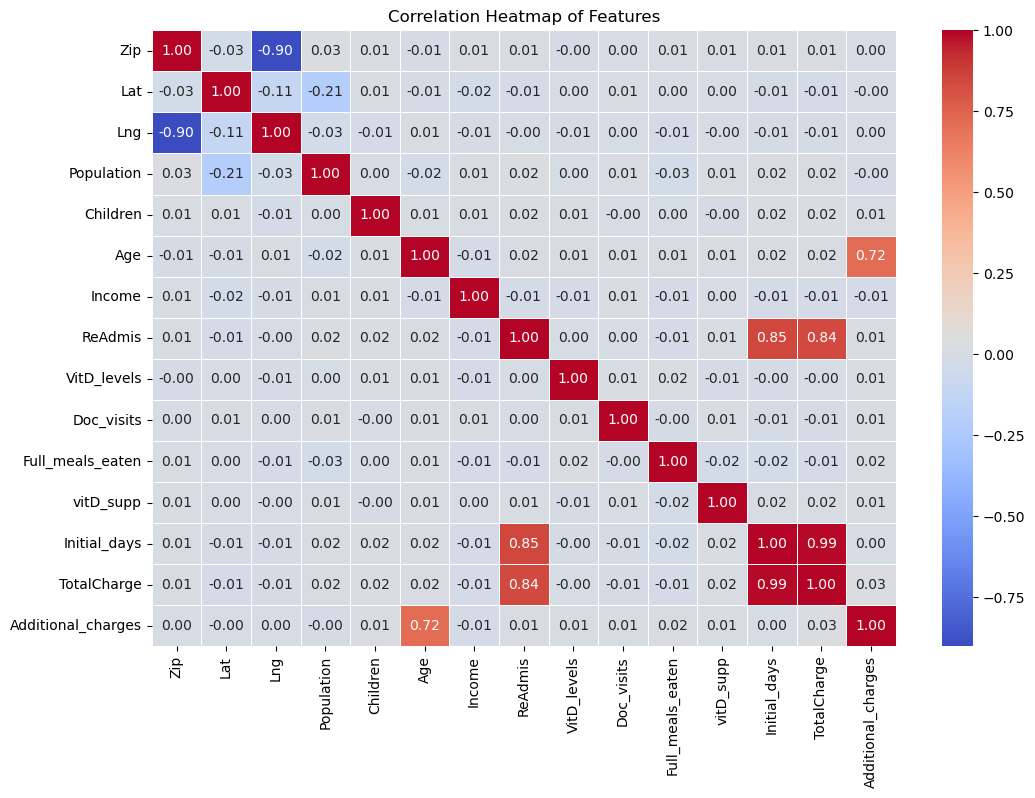

In [11]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_kmeans_scaled.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show();

We will use 2 variables for the clustering algorithm, namely Age and VitD levels.  
Reason:  
    - Age: While it has some correlation with Additional_charges (0.72), it’s not too high, and age can offer valuable insights for clustering.  
    - VitD_levels: This feature has low correlations with others and could provide interesting insights related to health in the clustering process.

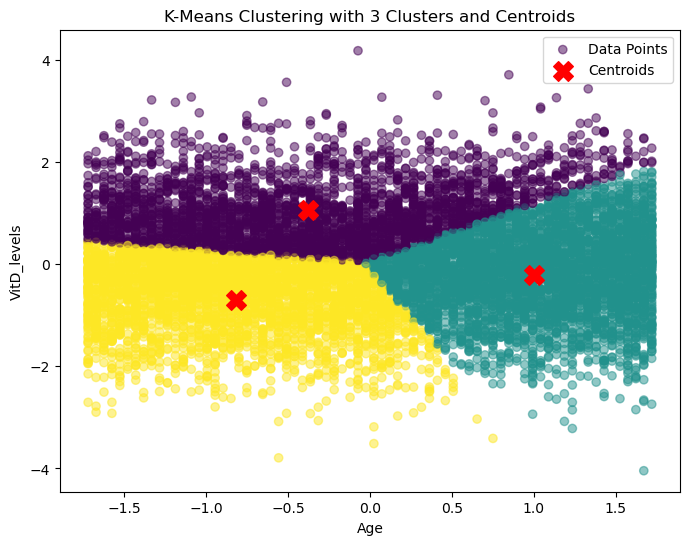

In [15]:
from sklearn.cluster import KMeans

# Extract the relevant features
features = ['Age', 'VitD_levels']
df_cluster = df_kmeans_scaled[features]

# Run K-Means with 3 clusters (k=3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Visualize the clusters and centroids using scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for the data points, colored by cluster
plt.scatter(df_cluster['Age'], df_cluster['VitD_levels'], c=df_cluster['Cluster'], cmap='viridis', alpha=0.5, label='Data Points')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')  # Centroids are marked with 'X' and red color

# Add labels and title
plt.title(f"K-Means Clustering with {k_optimal} Clusters and Centroids")
plt.xlabel('Age')
plt.ylabel('VitD_levels')
plt.legend()
plt.show();

In [12]:
# from sklearn.cluster import KMeans

# # 1. Extract the relevant features
# features = ['Income', 'Age', 'VitD_levels']
# df_cluster = df_kmeans_scaled[features]

# # 2. Perform K-Means clustering
# # We'll use the Elbow Method to determine the optimal number of clusters
# sse = []  # Sum of squared distances
# k_range = range(1, 11)  # Testing cluster numbers from 1 to 10

# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(df_cluster)
#     sse.append(kmeans.inertia_)  # inertia is the sum of squared distances to the nearest cluster center

# # 3. Plot the Elbow Method to find the optimal number of clusters
# plt.figure(figsize=(8, 6))
# plt.plot(k_range, sse, marker='o')
# plt.title('Elbow Method For Optimal k')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Sum of squared distances (Inertia)')
# plt.show();


Based on the graph above, the optimal number of clusters is between 3 and 4. We will use 3 for simplicity.

In [13]:
# # Run K-Means with 3 clusters (k=3)
# k_optimal = 3

# kmeans = KMeans(n_clusters=k_optimal, random_state=42)
# df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)

# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=k_optimal, random_state=42)
# df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)

# # Get the cluster centroids
# centroids = kmeans.cluster_centers_

# # Visualize the clusters and centroids using scatter plot
# plt.figure(figsize=(8, 6))

# # Scatter plot for the data points, colored by cluster
# plt.scatter(df_cluster['Income'], df_cluster['VitD_levels'], c=df_cluster['Cluster'], cmap='viridis', alpha=0.5, label='Data Points')

# # Plot the centroids
# plt.scatter(centroids[:, 0], centroids[:, 2], s=200, c='red', marker='X', label='Centroids')  # Centroids are marked with 'X' and red color

# # Add labels and title
# plt.title(f"K-Means Clustering with {k_optimal} Clusters and Centroids")
# plt.xlabel('Income')
# plt.ylabel('VitD_levels')
# plt.legend()
# plt.show();